# Structural similarity

In [27]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv
with open('data/CHEMBL27-chembl_27_activity-Or8O5vK6yNZ1L5id7ev7PGK1lWhfDfRKRJbbuXPM9Os=.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    cnr1_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [12:08:17] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [12:08:26] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:08:26] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [12:08:26] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [12:08:26] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [12:08:26] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:08:26] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:08:26] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [12:08:26] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:08:26] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [12:08:26] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [12:08:26] ERROR: Explicit v

In [28]:
from rdkit.Chem import MACCSkeys
cnr1_ligands_maccs = [MACCSkeys.GenMACCSKeys(m) for m in cnr1_ligands]
drugs_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugs]

In [29]:
from rdkit import DataStructs
def similarity_search(query_fp, searched_fp_set, cutoff=0.8):
    # we have no index, so we will have to just iterate through the entire searched set
    hits = []
    for i, fp in enumerate(searched_fp_set):
        similarity = DataStructs.TanimotoSimilarity(query_fp, fp)
        if similarity >= cutoff: # similar enough for consideration
            hits.append((i, similarity))
    return sorted(hits, key=lambda x: x[1], reverse=True)

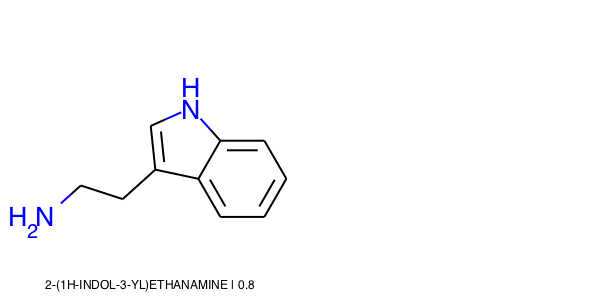

In [30]:
serotonin = Chem.MolFromSmiles('C1=CC2=C(C=C1O)C(=CN2)CCN')
serotonin_fp = MACCSkeys.GenMACCSKeys(serotonin)
hits = similarity_search(serotonin_fp, drugs_maccs)
Draw.MolsToGridImage([drugs[hit[0]] for hit in hits],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=["{} | {}".format(drugs[hit[0]].GetProp('GENERIC_NAME'), hit[1]) for hit in hits])

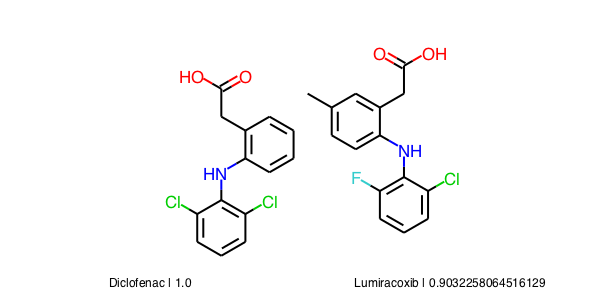

In [31]:
diclofenac = Chem.MolFromSmiles('C1=CC=C(C(=C1)CC(=O)O)NC2=C(C=CC=C2Cl)Cl')
diclofenac_fp = MACCSkeys.GenMACCSKeys(diclofenac)
hits = similarity_search(diclofenac_fp, drugs_maccs)
Draw.MolsToGridImage([drugs[hit[0]] for hit in hits],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=["{} | {}".format(drugs[hit[0]].GetProp('GENERIC_NAME'), hit[1]) for hit in hits])

In [32]:
hits = similarity_search(cnr1_ligands_maccs[0], drugs_maccs)
hits

[(105, 1.0)]

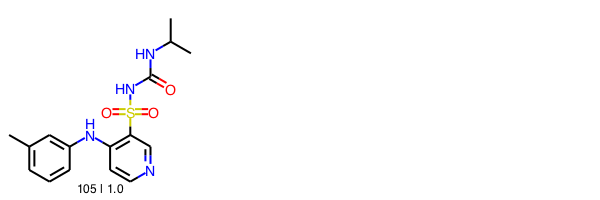

In [33]:
Draw.MolsToGridImage([drugs[hit[0]] for hit in hits], legends=["{} | {}".format(hit[0], hit[1]) for hit in hits])

In [35]:
cnr1_ligands_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in cnr1_ligands]
drugs_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugs]

In [37]:
def less_similarity_search(query_fp, searched_fp_set, cutoff=0.6):
    # we have no index, so we will have to just iterate through the entire searched set
    hits = []
    for i, fp in enumerate(searched_fp_set):
        similarity = DataStructs.TanimotoSimilarity(query_fp, fp)
        if similarity >= cutoff: # similar enough for consideration
            hits.append((i, similarity))
    return sorted(hits, key=lambda x: x[1], reverse=True)

In [39]:
hits = less_similarity_search(cnr1_ligands_ecfp[0], drugs_ecfp)
hits

[(105, 1.0)]

In [42]:
cnr1_ligands_queries = [(i, similarity_search(ligand_ecfp, drugs_ecfp))
                     for i, ligand_ecfp in enumerate(cnr1_ligands_ecfp)]
cnr1_ligands_queries

[(0, [(105, 1.0)]),
 (1, []),
 (2, []),
 (3, [(1079, 1.0)]),
 (4, []),
 (5, [(570, 1.0)]),
 (6, []),
 (7, []),
 (8, []),
 (9, []),
 (10, []),
 (11, [(4647, 1.0)]),
 (12, [(1663, 1.0), (3547, 1.0)]),
 (13, []),
 (14, []),
 (15, [(206, 1.0)]),
 (16, []),
 (17, []),
 (18, [(368, 1.0)]),
 (19, []),
 (20, [(418, 1.0)]),
 (21, [(265, 1.0), (275, 1.0), (822, 1.0)]),
 (22, []),
 (23, []),
 (24, []),
 (25, []),
 (26, []),
 (27, []),
 (28, []),
 (29, [(705, 1.0)]),
 (30, [(1023, 1.0), (372, 0.8387096774193549), (191, 0.8)]),
 (31, []),
 (32, []),
 (33, []),
 (34, []),
 (35, []),
 (36, []),
 (37, []),
 (38, [(2723, 1.0)]),
 (39, [(6975, 1.0)]),
 (40, []),
 (41, [(4332, 0.9285714285714286)]),
 (42, []),
 (43, []),
 (44, []),
 (45, []),
 (46, []),
 (47, []),
 (48, []),
 (49, [(6926, 1.0)]),
 (50, []),
 (51, [(465, 1.0)]),
 (52, [(559, 1.0)]),
 (53, []),
 (54, []),
 (55, []),
 (56, []),
 (57, []),
 (58, []),
 (59, [(188, 1.0)]),
 (60, [(6624, 1.0)]),
 (61, []),
 (62, []),
 (63, [(4288, 0.97297297297

In [47]:
cnr1_ligand_hits = [hit for hit in cnr1_ligands_queries if hit[1]]
len(cnr1_ligand_hits), len(cnr1_ligands_queries)

(669, 2698)

In [54]:
cnr1_ligand_hits[7], cnr1_ligand_hits[666]

((20, [(418, 1.0)]), (2660, [(1215, 0.967741935483871)]))

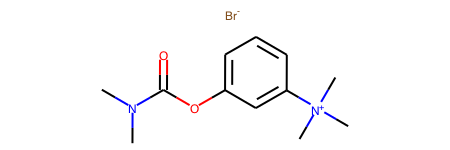

In [56]:
cnr1_ligands[cnr1_ligand_hits[666][0]]

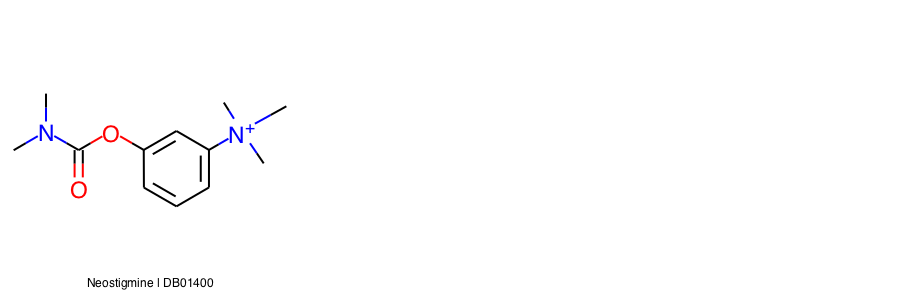

In [57]:
hit_mols = [drugs[index] for index, similarity in cnr1_ligand_hits[666][1]]
Draw.MolsToGridImage(hit_mols, molsPerRow=3, subImgSize=(300,300),
                     legends=["{} | {}".format(m.GetProp('GENERIC_NAME'), m.GetProp('DRUGBANK_ID'))
                              for m in hit_mols])

In [67]:
drugs_hitcounts = {}
for ligand, hits in cnr1_ligand_hits[100:120]:
    for hit, similarity in hits:
        drugs_hitcounts[hit] = drugs_hitcounts.get(hit, 0) + 1
drugs_hitcounts

{315: 1,
 4282: 1,
 925: 2,
 476: 2,
 968: 1,
 4543: 1,
 6776: 1,
 4167: 1,
 377: 1,
 1084: 1,
 1214: 1,
 365: 1,
 564: 1,
 337: 1,
 5342: 1,
 4148: 1,
 622: 1,
 3372: 1,
 840: 1,
 917: 1,
 1189: 1}

In [68]:
ordered_drugs_hitcounts = sorted(drugs_hitcounts.keys(), key=lambda x: drugs_hitcounts[x], reverse=True)
ordered_drugs_hitcounts

[925,
 476,
 315,
 4282,
 968,
 4543,
 6776,
 4167,
 377,
 1084,
 1214,
 365,
 564,
 337,
 5342,
 4148,
 622,
 3372,
 840,
 917,
 1189]

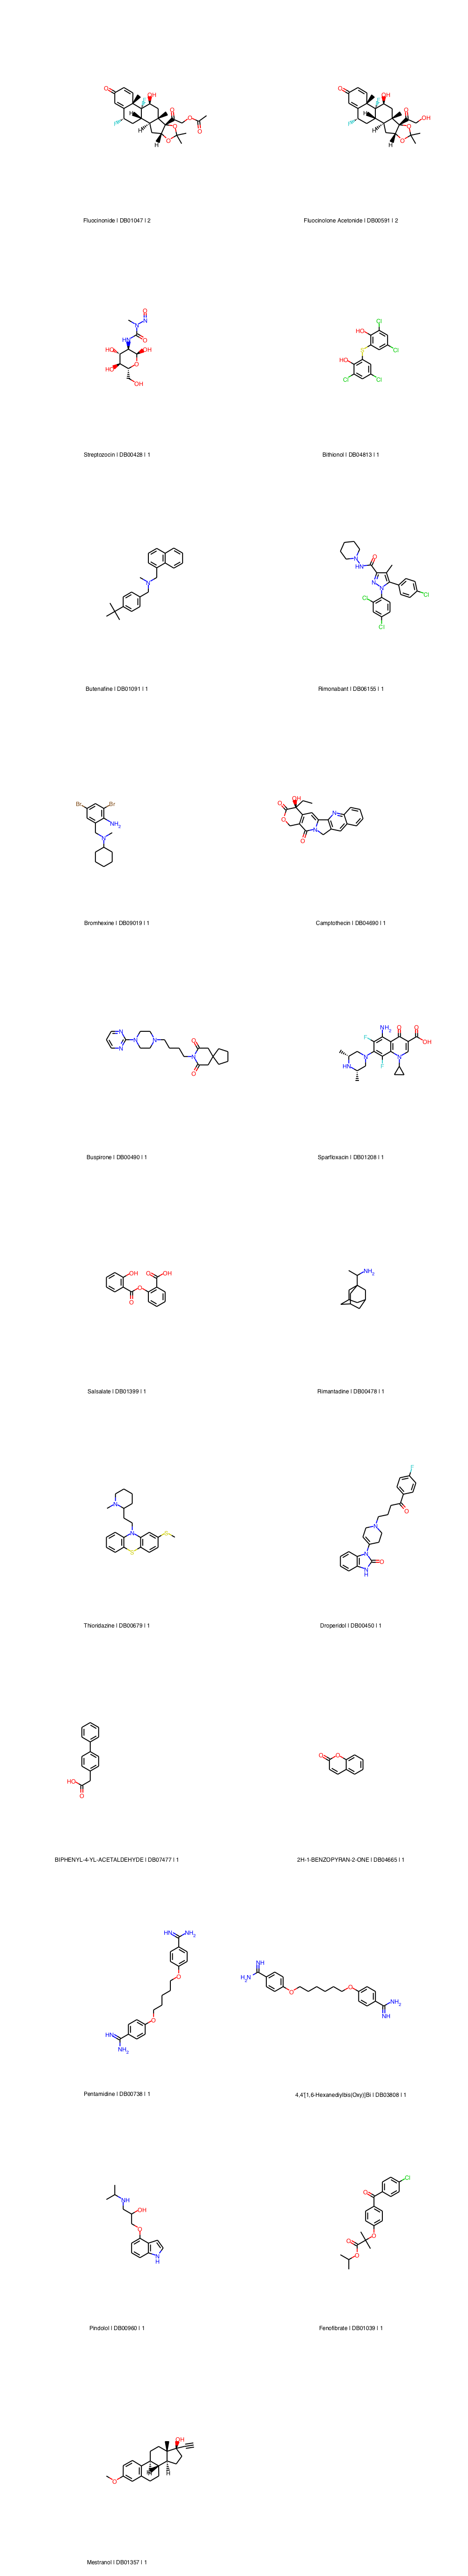

In [69]:
hit_mols = [drugs[i] for i in ordered_drugs_hitcounts]
Draw.MolsToGridImage(hit_mols, molsPerRow=2, subImgSize=(500,500),
                     legends=["{} | {} | {}".format(drugs[i].GetProp('GENERIC_NAME')[:30], # just cut off too long IUPAC stuff
                                                    drugs[i].GetProp('DRUGBANK_ID'),
                                                    drugs_hitcounts[i])
                              for i in ordered_drugs_hitcounts])

In [78]:
def distance_function(index1, index2, *args, cheminformaticsfingerprints=cnr1_ligands_ecfp,
                      metric=DataStructs.TanimotoSimilarity):
    return 1 - DataStructs.FingerprintSimilarity(cheminformaticsfingerprints[index1],
                                                 cheminformaticsfingerprints[index2],
                                                 metric=metric)

In [84]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
picker = MaxMinPicker()
picked = list(picker.LazyPick(distance_function, len(cnr1_ligands), 15))
picked


[1619,
 58,
 376,
 478,
 2080,
 1465,
 12,
 1832,
 217,
 1229,
 1211,
 2313,
 355,
 498,
 2256]

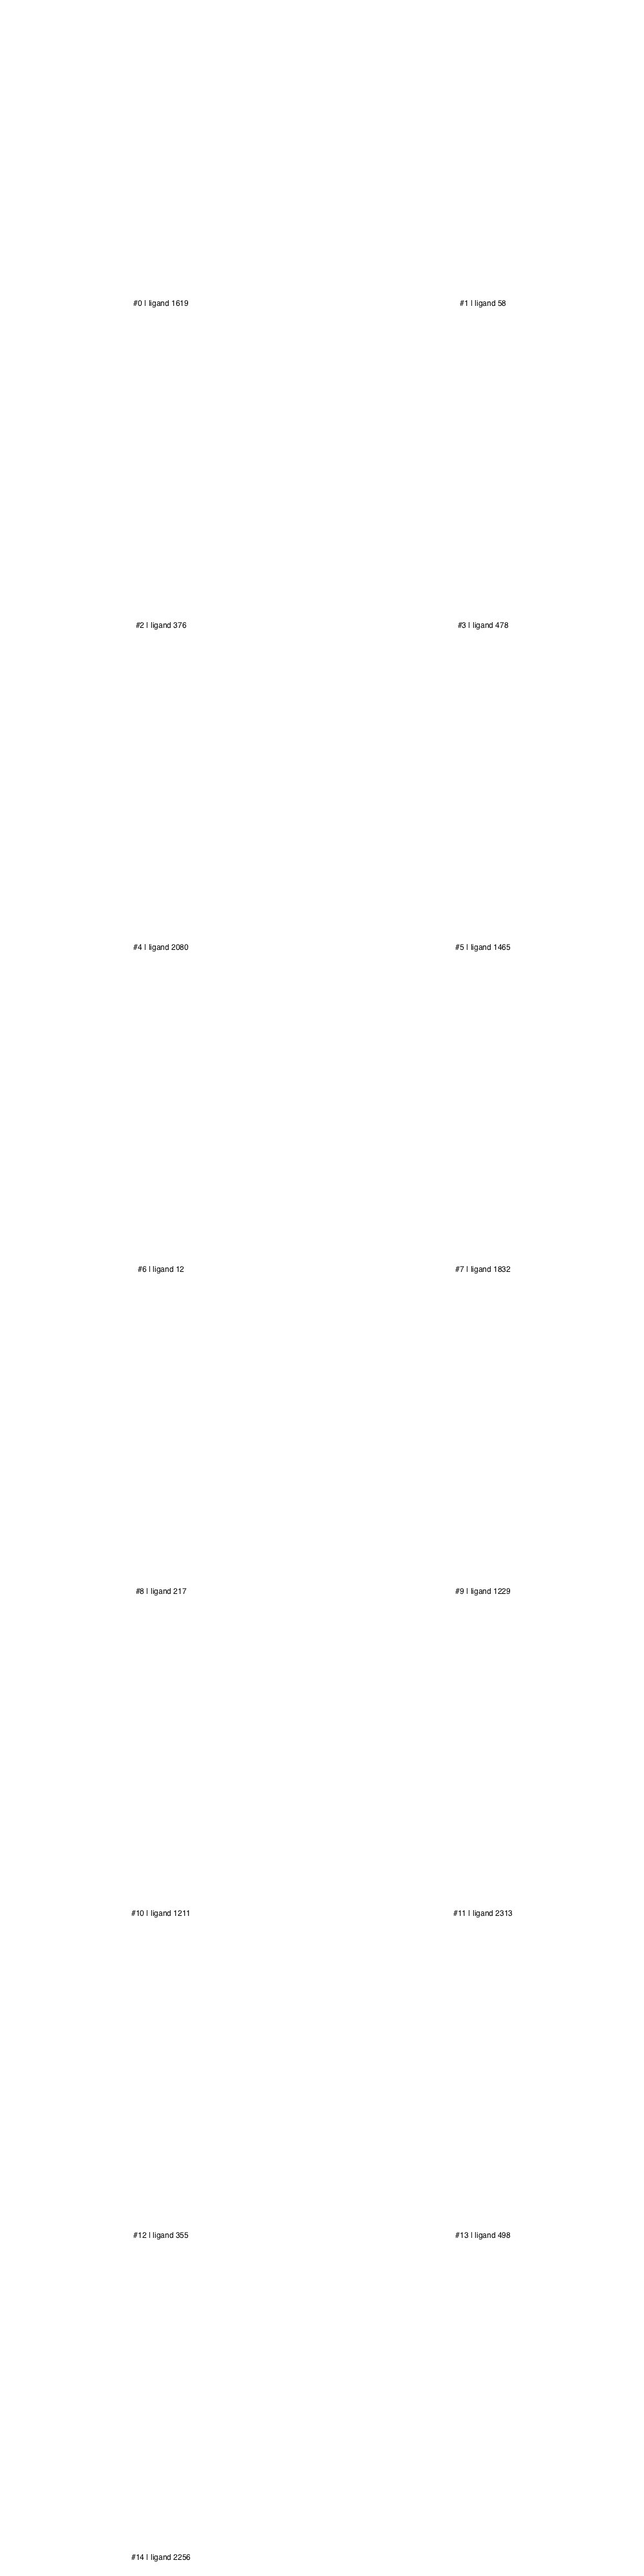

In [85]:
Draw.MolsToGridImage([cnr1_ligands[i] for i in picked], molsPerRow=2, subImgSize=(500,500),
                     legends=["#{} | ligand {}".format(i, hit) for i, hit in enumerate(picked)])